In [119]:
import numpy as np
import random

In [121]:
rows, cols = 5,5
n_states = rows*cols
actions = [0,1,2,3]
Q = np.zeros((n_states, len(actions)))

In [165]:
obstacles = [(2,0),(2,1),(0,1),(2,2),(0,4),(1,4),(3,3),(4,3),(3,0),(4,0),(3,1),(4,1),(3,2),(4,2)]

In [167]:
goal = (4,4)
def get_reward(coord):
    if coord in obstacles:
        return -1
    return 1 if coord == goal else -0.1

In [169]:
def to_state(x,y):
    return y*cols +x

In [171]:
def to_coord(state):
    return (state % cols, state//cols)

In [173]:
def step(x,y,action):
    new_x,new_y = x,y
    if action == 0: new_y=max(0,y-1)
    if action == 1: new_y=min(rows-1,y+1)
    if action == 2: new_x=max(0,x-1)
    if action == 3: new_x=min(cols-1,x+1)
    if (new_x,new_y) in obstacles:
        return x,y
    return new_x,new_y

In [175]:
alpha = 0.1
gamma = 0.9
epsilon = 0.3
episodes = 100000

In [177]:
for ep in range(episodes):
    x,y=0,0
    while (x,y)!=goal:
        state = to_state(x,y)
        if random.uniform(0,1) < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(Q[state])

        new_x,new_y=step(x,y,action)
        next_state = to_state(new_x,new_y)
        reward = get_reward((new_x,new_y))

        Q[state,action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state,action])
        x,y = new_x,new_y

In [181]:
action_symbols = ['↑', '↓', '←', '→']
grid = ""
for y in range(rows):
    row=""
    for x in range(cols):
        if (x,y) in obstacles:
            row += "X "
            continue
        elif (x,y) == goal:
            row += "G "
            continue
        state = to_state(x,y)
        best_action = np.argmax(Q[state])
        row += action_symbols[best_action] + " "
    grid += row +"\n"
print("Best policy with Obstacles:\n" + grid)

Best policy with Obstacles:
→ ↓ X X X 
X ↓ X X X 
↓ ↓ X X X 
→ → ↓ X X 
X X → → G 



# GIF

'q_learning_agent.gif'

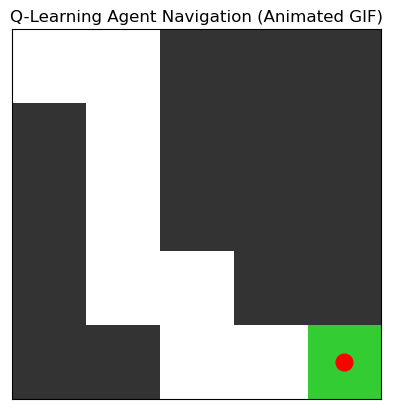

In [192]:
# Re-import required packages after state reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import random

# Grid world dimensions
rows, cols = 5, 5
n_states = rows * cols
actions = [0, 1, 2, 3]  # up, down, left, right
Q = np.zeros((n_states, len(actions)))

# Goal and obstacles
goal = (4, 4)
obstacles = [(2,0),(2,1),(0,1),(2,2),(0,4),(1,4),(3,3),(4,3),(3,0),(4,0),(3,1),(4,1),(3,2),(4,2),(0,2),(0,3)]

def to_state(x, y):
    return y * cols + x

def to_coord(state):
    return (state % cols, state // cols)

def step(x, y, action):
    new_x, new_y = x, y
    if action == 0: new_y = max(0, y - 1)
    if action == 1: new_y = min(rows - 1, y + 1)
    if action == 2: new_x = max(0, x - 1)
    if action == 3: new_x = min(cols - 1, x + 1)
    if (new_x, new_y) in obstacles:
        return x, y
    return new_x, new_y

def get_reward(coord):
    if coord in obstacles:
        return -1
    elif coord == goal:
        return 1
    else:
        return -0.1

# Q-learning parameters
alpha = 0.1
gamma = 0.9
epsilon = 0.3
episodes = 1000

for ep in range(episodes):
    x, y = 0, 0
    steps = 0
    max_steps = 100
    while (x, y) != goal and steps < max_steps:
        state = to_state(x, y)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(Q[state])
        new_x, new_y = step(x, y, action)
        next_state = to_state(new_x, new_y)
        reward = get_reward((new_x, new_y))
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        x, y = new_x, new_y
        steps += 1

# Extract best path
def get_best_path():
    x, y = 0, 0
    path = [(x, y)]
    visited = set(path)
    while (x, y) != goal:
        state = to_state(x, y)
        action = np.argmax(Q[state])
        new_x, new_y = step(x, y, action)
        if (new_x, new_y) in visited:
            break
        path.append((new_x, new_y))
        visited.add((new_x, new_y))
        x, y = new_x, new_y
    return path

path = get_best_path()

# Create animated GIF
grid_display = np.ones((rows, cols, 3))  # white grid
for y in range(rows):
    for x in range(cols):
        if (x, y) in obstacles:
            grid_display[y, x] = [0.2, 0.2, 0.2]
        elif (x, y) == goal:
            grid_display[y, x] = [0.2, 0.8, 0.2]

fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Q-Learning Agent Navigation (Animated GIF)")
agent_img = ax.imshow(grid_display, interpolation='nearest')
agent_dot, = ax.plot([], [], 'ro', markersize=12)

def init_gif():
    agent_dot.set_data([], [])
    return agent_img, agent_dot

def update_gif(frame):
    x, y = path[frame]
    agent_dot.set_data([x], [y])  # ✅ fix here
    return agent_img, agent_dot


gif_anim = animation.FuncAnimation(
    fig, update_gif, frames=len(path), init_func=init_gif,
    interval=500, blit=True, repeat=False
)

# Save animation as GIF
gif_path = "q_learning_agent.gif"
gif_anim.save(gif_path, writer='pillow', fps=2)

gif_path
